In [1]:
# !!pip install -r requiremets.txt

In [2]:
import pandas as pd

data = pd.read_csv("dataset/goodreads_interactions.csv")
data

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
228648337,876144,24772,0,0,0
228648338,876144,23847,1,4,0
228648339,876144,23950,1,3,0
228648340,876144,374106,1,5,1


In [3]:
interactions = data
#filter those with valid rating value
interactions = interactions.loc[(interactions['rating'] > 3) & (interactions['is_read'] == 1)]
interactions

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
228648327,876144,70626,1,4,0
228648329,876144,572059,1,5,0
228648338,876144,23847,1,4,0
228648340,876144,374106,1,5,1


In [4]:
import random

users_groups = interactions.groupby('user_id').book_id.count()
print(users_groups.shape[0])
listt = users_groups[users_groups>1000].index.tolist()
# listt = random.sample(list(dict.fromkeys(interactions['user_id'])), 3565)
print(len(listt))


809697
3565


In [5]:
book_groups = interactions.groupby('book_id').user_id.count()
print(book_groups.count)
listtt = book_groups[book_groups>2000].index.tolist()
# listtt = random.sample(list(dict.fromkeys(interactions['book_id'])), 4214)
len(listtt)

<bound method Series.count of book_id
0           12
1           13
3          429
4            4
5            7
          ... 
2360645      1
2360646      1
2360647      1
2360648      1
2360649      1
Name: user_id, Length: 2063058, dtype: int64>


4214

In [6]:

interactions = interactions[interactions['user_id'].isin(listt) & interactions['book_id'].isin(listtt)]
interactions

,user_id,book_id,is_read,rating,is_reviewed
9278,14,12710,1,5,1
9279,14,1526,1,5,1
9280,14,1525,1,5,1
9282,14,5675,1,5,1
9284,14,6452,1,5,0
...,...,...,...,...,...
212157798,442377,26032,1,4,0
212157807,442377,10280,1,4,0
212157813,442377,5291,1,4,0
212157814,442377,5290,1,4,0


In [7]:
grouped = interactions.groupby('book_id')
print(grouped.count())

         user_id  is_read  rating  is_reviewed
book_id                                       
10           102      102     102          102
19            65       65      65           65
25           137      137     137          137
29            37       37      37           37
37            59       59      59           59
...          ...      ...     ...          ...
111165       148      148     148          148
111474       385      385     385          385
112047        95       95      95           95
130536       291      291     291          291
130950       153      153     153          153

[4213 rows x 4 columns]


In [8]:
# df = interactions.groupby('book_id').filter(lambda x: len(x) >= 2)
# df.count()

In [9]:
# def test(x):
#     print(len(x))
#     return len(x) >= 10

# grouped = interactions.groupby('book_id')
# group_sizes = grouped.size()
# mask = group_sizes >= 4
# grouped = interactions[interactions['book_id'].isin(group_sizes[mask].index)]
# grouped.describe()

In [10]:
# def test(x):
#     print(x)
#     return x

# grouped.head(1).apply(test)

In [11]:
# for group_name, group_df in grouped:
#     print(f"Group: {group_name}")
#     print(group_df[['user_id', 'rating']])
#     print("\n")
#     break

In [12]:
# import networkx as nx
# from multiprocessing import Pool

# G = nx.Graph()
# edges = []

# for group_name, group_df in grouped:
#     print(f"Group: {group_name}")
#     for i in range(0,group_df.shape[0]-1):
#         for j in range(i+1, group_df.shape[0]):
#             edges.append((int(group_df.iloc[i]['user_id']), int(group_df.iloc[j]['user_id'])))

# print(edges[0])
# G.add_edges_from(edges)


In [13]:
import concurrent.futures
import networkx as nx
import time

In [14]:
# def process_group(group_name, group_df):
#     print(f"{group_name} started")
#     t = time.process_time()
#     edges = []
#     for i in range(group_df.shape[0] - 1):
#         for j in range(i + 1, group_df.shape[0]):
#             edges.append((int(group_df.iloc[i]['user_id']), int(group_df.iloc[j]['user_id'])))
    
#     elapsed_time = time.process_time() - t
#     print(f"{group_name} with {len(group_df)} took {elapsed_time:.2f} seconds")

# process_group('20', grouped.get_group(41))

In [15]:
def process_group(group_name, group_df):
    print(f"{group_name} started")
    t = time.time()
    edges = []
    ll = group_df['user_id'].tolist()
    for i in range(len(ll) - 1):
        for j in range(i + 1, len(ll)):
            edges.append((int(ll[i]), int(ll[j])))
    
    elapsed_time = time.time() - t
    print(f"{group_name} with {len(group_df)} took {elapsed_time:.3f} seconds")

process_group('41', grouped.get_group(41))

41 started
41 with 31 took 0.000 seconds


In [16]:
# %%script false --no-raise-error

G = nx.Graph()

def process_group(group_name, group_df):
    print(f"{group_name} started")
    t = time.time()
    edges = []
    ll = group_df['user_id'].tolist()
    for i in range(len(ll) - 1):
        for j in range(i + 1, len(ll)):
            edges.append((int(ll[i]), int(ll[j])))
    
    elapsed_time = time.time() - t

    G.add_edges_from(edges)
    print(f"{group_name} with {len(group_df)} took {elapsed_time:.3f} seconds")

def progress_tracker(futures):
    completed_count = 0
    total_count = len(futures)
    print(total_count)
    while completed_count < total_count:
        completed_count = sum(f.done() for f in futures)
        print(f"Progress: {completed_count}/{total_count} groups processed")
        time.sleep(1)

with concurrent.futures.ThreadPoolExecutor(1000) as executor:
    # Submit each group to the executor
    futures = [executor.submit(process_group, group_name, group_df) for group_name, group_df in grouped]
    # futures.append(executor.submit(progress_tracker, futures))

# Wait for all tasks to complete
concurrent.futures.wait(futures)
# progress_thread.result()

# all_edges = [v for f in futures for v in f.result()]
# print(len(all_edges))
# G.add_edges_from(all_edges)


10 started19 started
19 with 65 took 0.000 seconds

10 with 102 took 0.000 seconds
25 started
25 with 137 took 0.000 seconds
29 started
29 with 37 took 0.000 seconds
37 started
37 with 59 took 0.000 seconds
41 started
41 with 31 took 0.000 seconds
43 started
49 started
49 with 231 took 0.001 seconds
43 with 312 took 0.028 seconds
51 started
55 started
63 started
63 with 118 took 0.000 seconds
64 started
64 with 90 took 0.000 seconds
55 with 375 took 0.001 seconds
66 started
68 started
68 with 28 took 0.000 seconds
71 started
71 with 64 took 0.001 seconds
51 with 345 took 0.048 seconds
80 started
80 with 356 took 0.003 seconds
84 started
92 started
92 with 73 took 0.001 seconds
100 started
100 with 223 took 0.000 seconds
84 with 50 took 0.000 seconds
105 started
105 with 103 took 0.000 seconds
111 started
111 with 182 took 0.001 seconds
119 started
119 with 12 took 0.000 seconds
123 started
123 with 45 took 0.000 seconds
126 started
128 started
128 with 87 took 0.000 seconds
126 with 38

DoneAndNotDoneFutures(done={<Future at 0x20887100050 state=finished returned NoneType>, <Future at 0x208c64e00e0 state=finished returned NoneType>, <Future at 0x208b52e00e0 state=finished returned NoneType>, <Future at 0x208c5ca00e0 state=finished returned NoneType>, <Future at 0x208a0540110 state=finished returned NoneType>, <Future at 0x208b29a0170 state=finished returned NoneType>, <Future at 0x208cd560170 state=finished returned NoneType>, <Future at 0x208c64c01a0 state=finished returned NoneType>, <Future at 0x208c65001a0 state=finished returned NoneType>, <Future at 0x208c5c801a0 state=finished returned NoneType>, <Future at 0x208871001d0 state=finished returned NoneType>, <Future at 0x208b1660260 state=finished returned NoneType>, <Future at 0x208c5ca0260 state=finished returned NoneType>, <Future at 0x208c64e0260 state=finished returned NoneType>, <Future at 0x208925c02c0 state=finished returned NoneType>, <Future at 0x208925c02f0 state=finished returned NoneType>, <Future at 0

In [17]:
print(G.number_of_edges())
print(G.number_of_nodes())
print((G.number_of_edges()*2)/G.number_of_nodes())

5474642
3551
3083.4367783722896


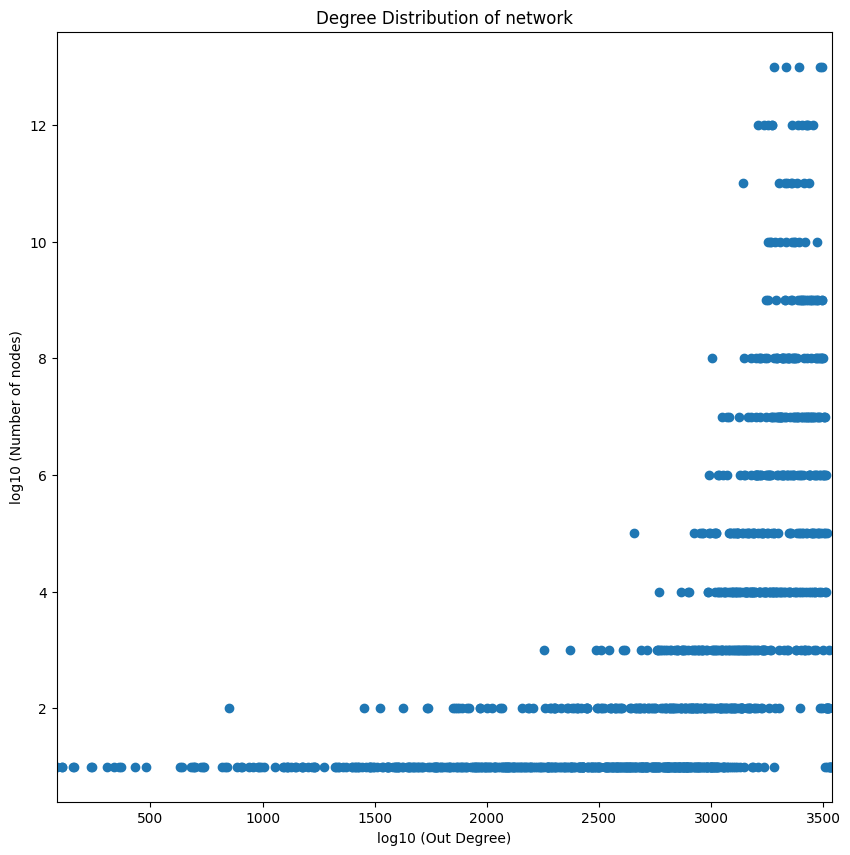

In [18]:
import numpy as np
import matplotlib.pyplot as plt


out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

plt.figure(figsize=(10,10))
plt.xlim(min(x), max(x))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(x, y, 'o')